<a href="https://colab.research.google.com/github/anjunjin/PFE-ING3-IA/blob/master/Repr%C3%A9sentation_du_texte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Partie "commune"

In [157]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix, hstack

In [158]:
# import scattertext as st
# import spacy
# from spacy.tokenizer import Tokenizer
# from spacy.lang.fr import French

In [159]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
DATA_PATH = "/content/drive/My Drive/PFE/"
data = pd.read_csv(DATA_PATH+"Tweets_nettoyés_210322.csv", encoding='utf-8').drop(['Unnamed: 0'], axis=1)
sentiments = pd.read_csv(DATA_PATH+"sentiments.csv", encoding='utf-8').drop(['Unnamed: 0'], axis=1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [160]:
def to_ints(text):
  res = 1
  if (text=='Positive'):
    res = 2
  elif (text=='negative'):
    res = 0
  
  return res

In [161]:
sentiments['sentiment'] = sentiments['sentiment'].apply(lambda x: to_ints(x))

In [162]:
sentiments

,sentiment
0,1
1,1
2,1
3,1
4,1
...,...
721513,2
721514,1
721515,1
721516,1


On peut décider de n'utiliser qu'une partie de nos tweets pour l'entrainement

In [163]:
# data = data.sample(n=20000, replace=False, random_state=42)

In [164]:
data.shape

(722280, 10)

Il est possible qu'après le nettoyage des tweets certains colonnes soient vides (et donc inutilisables). On retire ces colonnes.

In [165]:
# data.sort_values(by = 'cleaned').tail(100)

In [166]:
data = data.dropna()

In [167]:
# data.sort_values(by = 'cleaned').tail(100)

In [168]:
data.shape

(721518, 10)

On transforme de la donnée selon les recherches dans AnalysteTweets.ipynb

In [169]:
list_percent_rt = []
list_percent_fav = []
length_data = data.shape[0]
for index, row in data.iterrows():
  if (index % int(length_data/20) == 0):
    print(str(int(5*index / int(length_data/20)))+"% / 100%")
  list_percent_rt.append(row['retweet_count']/row['count_followers'])
  list_percent_fav.append(row['favorite_count']/row['count_followers'])
data['rt_per_followers'] = list_percent_rt
data['fav_per_followers'] = list_percent_fav

0% / 100%
5% / 100%
10% / 100%
15% / 100%
20% / 100%
25% / 100%
30% / 100%
35% / 100%
40% / 100%
45% / 100%
50% / 100%
55% / 100%
60% / 100%
65% / 100%
70% / 100%
75% / 100%
80% / 100%
85% / 100%
90% / 100%
95% / 100%
100% / 100%


In [170]:
data.sample(n=100, replace=False, random_state=42)

,liability,liability_label,description,user_screen_name,retweet_count,favorite_count,count_followers,tweet,cleaned,tagged,rt_per_followers,fav_per_followers
80118,0,site plutôt fiable,Site d'enquêtes et de reportages réalisés par ...,Rue89Bordeaux,0.0,2.0,11188.0,Plus que quelques heures pour vous inscrire au...,heures inscrire mobilité desident_link,Plus_ADV que_SCONJ quelques_DET heures_NOUN po...,0.000000e+00,0.000179
200801,0,site plutôt fiable,La version française du magazine généraliste a...,Slatefr,1.0,0.0,712703.0,RT @koriifr: Comment un homme a volé un millio...,rt homme volé million tournoi golf desident_link,RT_X @koriifr_PROPN :_PUNCT Comment_ADV un_DET...,1.403109e-06,0.000000
171297,0,site plutôt fiable,"Un des principaux quotidiens britanniques, tra...",Independent,4.0,22.0,3634561.0,Ex-Trump chief of staff Mark Meadows now coope...,extrump chief of staff mark meadows now cooper...,Ex_ADV -_PUNCT Trump_PROPN chief_PROPN of_X st...,1.100546e-06,0.000006
474999,0,site plutôt fiable,"Un site de vérification des rumeurs, focalisé ...",DebunkerHED,0.0,0.0,3485.0,"@ifeu7 On s'est arrêté à ""pas sûr"".",sest arrêté sûr,@ifeu7_PROPN On_PRON s'_PRON est_AUX arrêté_VE...,0.000000e+00,0.000000
484198,0,site plutôt fiable,"Un quotidien et site Internet italien, parmi l...",Corriere,1.0,0.0,2438816.0,Bonomi: «Bene ridurre le tasse ma la priorità ...,bonomi «bene ridurre tasse priorità tagliare ...,Bonomi_PROPN :_PUNCT «_PROPN Bene_PROPN ridurr...,4.100350e-07,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
46267,1,site plutôt douteux,Un site anti-Hollande qui a diffusé de nombreu...,David_vanH,11.0,17.0,22006.0,Bon dimanche des Rameaux à tous !!\n« Merci le...,bon desident_date rameaux « gars devriez porte...,Bon_ADJ dimanche_NOUN des_DET Rameaux_NOUN à_A...,4.998637e-04,0.000773
709797,0,site plutôt fiable,"Attention, il ne s'agit pas d'articles de « L'...",LePlus,3.0,2.0,30815.0,"Français, je vis au Royaume-Uni depuis 22 ans....",français vis royaumeuni desident_number ans br...,"Français_ADJ ,_PUNCT je_PRON vis_AUX au_DET Ro...",9.735518e-05,0.000065
625350,1,site plutôt douteux,Un site se présentant comme « média global de ...,Demotivateur,85.0,128.0,93983.0,Une piscine cachée sous votre jardin ! 😍 https...,piscine cachée jardin 😍 desident_link,Une_DET piscine_NOUN cachée_VERB sous_ADP votr...,9.044189e-04,0.001362
54996,1,site plutôt douteux,"Un site internet créé par Michel Collon, milit...",InvestigAction,0.0,2.0,7523.0,"« L’affaire Assange n’est pas connue, on racon...",« ’affaire assange ’est connue raconte sortes ...,«_PRON L’_ADJ affaire_NOUN Assange_PROPN n’_AD...,0.000000e+00,0.000266


In [171]:
data.shape[0]

721518

Ajout d'une colonne sur l'analyse des sentiments

In [172]:
data['sentiments'] = sentiments

In [173]:
data.sample(n=100, replace=False, random_state=42)

,liability,liability_label,description,user_screen_name,retweet_count,favorite_count,count_followers,tweet,cleaned,tagged,rt_per_followers,fav_per_followers,sentiments
80118,0,site plutôt fiable,Site d'enquêtes et de reportages réalisés par ...,Rue89Bordeaux,0.0,2.0,11188.0,Plus que quelques heures pour vous inscrire au...,heures inscrire mobilité desident_link,Plus_ADV que_SCONJ quelques_DET heures_NOUN po...,0.000000e+00,0.000179,1.0
200801,0,site plutôt fiable,La version française du magazine généraliste a...,Slatefr,1.0,0.0,712703.0,RT @koriifr: Comment un homme a volé un millio...,rt homme volé million tournoi golf desident_link,RT_X @koriifr_PROPN :_PUNCT Comment_ADV un_DET...,1.403109e-06,0.000000,1.0
171297,0,site plutôt fiable,"Un des principaux quotidiens britanniques, tra...",Independent,4.0,22.0,3634561.0,Ex-Trump chief of staff Mark Meadows now coope...,extrump chief of staff mark meadows now cooper...,Ex_ADV -_PUNCT Trump_PROPN chief_PROPN of_X st...,1.100546e-06,0.000006,0.0
474999,0,site plutôt fiable,"Un site de vérification des rumeurs, focalisé ...",DebunkerHED,0.0,0.0,3485.0,"@ifeu7 On s'est arrêté à ""pas sûr"".",sest arrêté sûr,@ifeu7_PROPN On_PRON s'_PRON est_AUX arrêté_VE...,0.000000e+00,0.000000,1.0
484198,0,site plutôt fiable,"Un quotidien et site Internet italien, parmi l...",Corriere,1.0,0.0,2438816.0,Bonomi: «Bene ridurre le tasse ma la priorità ...,bonomi «bene ridurre tasse priorità tagliare ...,Bonomi_PROPN :_PUNCT «_PROPN Bene_PROPN ridurr...,4.100350e-07,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46267,1,site plutôt douteux,Un site anti-Hollande qui a diffusé de nombreu...,David_vanH,11.0,17.0,22006.0,Bon dimanche des Rameaux à tous !!\n« Merci le...,bon desident_date rameaux « gars devriez porte...,Bon_ADJ dimanche_NOUN des_DET Rameaux_NOUN à_A...,4.998637e-04,0.000773,1.0
709797,0,site plutôt fiable,"Attention, il ne s'agit pas d'articles de « L'...",LePlus,3.0,2.0,30815.0,"Français, je vis au Royaume-Uni depuis 22 ans....",français vis royaumeuni desident_number ans br...,"Français_ADJ ,_PUNCT je_PRON vis_AUX au_DET Ro...",9.735518e-05,0.000065,1.0
625350,1,site plutôt douteux,Un site se présentant comme « média global de ...,Demotivateur,85.0,128.0,93983.0,Une piscine cachée sous votre jardin ! 😍 https...,piscine cachée jardin 😍 desident_link,Une_DET piscine_NOUN cachée_VERB sous_ADP votr...,9.044189e-04,0.001362,1.0
54996,1,site plutôt douteux,"Un site internet créé par Michel Collon, milit...",InvestigAction,0.0,2.0,7523.0,"« L’affaire Assange n’est pas connue, on racon...",« ’affaire assange ’est connue raconte sortes ...,«_PRON L’_ADJ affaire_NOUN Assange_PROPN n’_AD...,0.000000e+00,0.000266,2.0


In [174]:
data.shape

(721518, 13)

In [175]:
data = data.dropna()

In [176]:
data.shape

(720757, 13)

# Séparation en 3

Divisier le model en 3 partie : train(60%), test(20%), valid(20%)

In [177]:
from sklearn.model_selection import train_test_split

On peut chercher à prédire en utilisant , , 

*   les tweets
*   le post-tagging des tweets
*   le nombre de followers du compte ayant posté le tweet (plus de followers sur les comptes fiables)
*   le pourcentage de retweets du tweet en fonction du nombre de followers du compte ayant posté le tweet (info fiable très peu retweeté)
*   le pourcentage de favoris du tweet en fonction du nombre de followers du compte ayant posté le tweet (info fiable très peu mise en favoris)


In [178]:
# X : le tweet et les infos sur le tweet
X = data[['cleaned', 'tagged', 'count_followers', 'rt_per_followers', 'fav_per_followers', 'sentiments']]

# y : le label indiquant la fiabilité du tweet
y = data['liability_label']

In [179]:
X.head(10)

,cleaned,tagged,count_followers,rt_per_followers,fav_per_followers,sentiments
0,🚨le professeur raoult écope ’un blâme ’ordre m...,🚨_SCONJ Le_DET professeur_NOUN Raoult_PROPN éc...,98322.0,0.000509,0.001027,1.0
1,rt recours déposé,RT_X @DIVIZIO1_PROPN :_PUNCT Recours_NOUN dépo...,98322.0,0.006540,0.000000,1.0
2,🎙best of pr michel drancourt ihu épidémies dhi...,🎙_NOUN BEST_X OF_PROPN -_PUNCT Pr_X Michel_PRO...,98322.0,0.000275,0.000600,1.0
3,📚 jonathan curiel directeur général adjoint pr...,"📚_PROPN Jonathan_PROPN Curiel_PROPN ,_PUNCT di...",98322.0,0.000142,0.000376,1.0
4,🖍 dessin jour retrouver desident_link desiden...,🖍_NOUN Le_DET dessin_PROPN du_DET jour_NOUN \n...,98322.0,0.000397,0.000803,1.0
5,🐖l214 annoncé déposé plainte mauvais traitemen...,🐖_PROPN L214_PROPN a_AUX annoncé_VERB avoir_AU...,98322.0,0.000529,0.001149,1.0
6,soutien dossier audelà porte plainte réinfoli...,Au_DET soutien_NOUN de_ADP ce_DET dossier_NOUN...,98322.0,0.000559,0.001637,1.0
7,🎥 heringuez défendu couple restaurateurs garde...,🎥_PROPN Me_NOUN Heringuez_PROPN a_AUX défendu_...,98322.0,0.002451,0.005045,1.0
8,’entretien complet desident_link,L’_DET entretien_NOUN complet_ADJ :_PUNCT http...,98322.0,0.000437,0.001017,1.0
9,best of 🎙️ guadeloupe ellen bessis soumïâa say...,BEST_NOUN OF_PROPN -_PUNCT 🎙_ADV ️_ADJ En_ADP ...,98322.0,0.003834,0.005614,2.0


In [180]:
y.head(10)

0    site plutôt douteux
1    site plutôt douteux
2    site plutôt douteux
3    site plutôt douteux
4    site plutôt douteux
5    site plutôt douteux
6    site plutôt douteux
7    site plutôt douteux
8    site plutôt douteux
9    site plutôt douteux
Name: liability_label, dtype: object

In [181]:
# 100% dataset : 80% train 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [182]:
# 80% dataset(train) : 80%*0.75=60% train  80%*0.25=20% test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [183]:
print("X_train.shape : ",X_train.shape,", X_val.shape : ",X_val.shape, ", X_test.shape : ",X_test.shape)

X_train.shape :  (432453, 6) , X_val.shape :  (144152, 6) , X_test.shape :  (144152, 6)


In [184]:
print("y_train.shape : ",y_train.shape,", y_val.shape : ",y_val.shape, ", y_test.shape : ",y_test.shape)

y_train.shape :  (432453,) , y_val.shape :  (144152,) , y_test.shape :  (144152,)


Visualiser le distribution de model

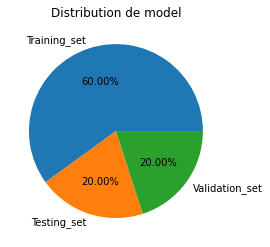

In [185]:
# model_size = np.array([X_train.count(), X_test.count(), X_val.count()])
model_size = np.array([X_train.count()[0], X_test.count()[0], X_val.count()[0]])

plt.pie(model_size,
        # labels de pie chart
        labels=['Training_set','Testing_set','Validation_set'], 
        # pourcentage
        autopct='%.2f%%', 
       )
plt.title("Distribution de model")
plt.show()

# TF-IDF

In [186]:
X_train.shape

(432453, 6)

Création des vecteurs de mots

In [187]:
"""from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = TfidfVectorizer(min_df=10, max_df=0.9)
# X_cleaned = vectorizer.fit_transform(X_train.tolist())

vectorizer_cleaned = TfidfVectorizer(min_df=10, max_df=0.9)
vectorizer_tagged = TfidfVectorizer(min_df=10, max_df=0.9)
X_cleaned = vectorizer_cleaned.fit_transform(X_train['cleaned'].tolist())
X_tagged = vectorizer_tagged.fit_transform(X_train['tagged'].tolist())"""

"from sklearn.feature_extraction.text import TfidfVectorizer\n\n# vectorizer = TfidfVectorizer(min_df=10, max_df=0.9)\n# X_cleaned = vectorizer.fit_transform(X_train.tolist())\n\nvectorizer_cleaned = TfidfVectorizer(min_df=10, max_df=0.9)\nvectorizer_tagged = TfidfVectorizer(min_df=10, max_df=0.9)\nX_cleaned = vectorizer_cleaned.fit_transform(X_train['cleaned'].tolist())\nX_tagged = vectorizer_tagged.fit_transform(X_train['tagged'].tolist())"

In [188]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_cleaned = TfidfVectorizer(min_df=10, max_df=0.9)
vectorizer_tagged = TfidfVectorizer(min_df=10, max_df=0.9)

# vectorizer = TfidfVectorizer(min_df=10, max_df=0.9)
# X_cleaned = vectorizer.fit_transform(X_train.tolist())

Train_X_cleaned_Tfidf = vectorizer_cleaned.fit_transform(X_train['cleaned'])
Train_X_tagged_Tfidf = vectorizer_tagged.fit_transform(X_train['tagged'])
Test_X_cleaned_Tfidf = vectorizer_cleaned.transform(X_test['cleaned'])
Test_X_tagged_Tfidf = vectorizer_tagged.transform(X_test['tagged'])

In [189]:
print("X_train.shape : ",X_train.shape,", X_test.shape : ",X_test.shape)
# print("Train_X_Tfidf.shape : ",Train_X_Tfidf.shape,", Test_X_Tfidf.shape : ",Test_X_Tfidf.shape)
print("Train_X_cleaned_Tfidf.shape : ",Train_X_cleaned_Tfidf.shape,", Test_X_cleaned_Tfidf.shape : ",Test_X_cleaned_Tfidf.shape)
print("Train_X_tagged_Tfidf.shape : ",Train_X_tagged_Tfidf.shape,", Test_X_tagged_Tfidf.shape : ",Test_X_tagged_Tfidf.shape)

X_train.shape :  (432453, 6) , X_test.shape :  (144152, 6)
Train_X_cleaned_Tfidf.shape :  (432453, 30702) , Test_X_cleaned_Tfidf.shape :  (144152, 30702)
Train_X_tagged_Tfidf.shape :  (432453, 37785) , Test_X_tagged_Tfidf.shape :  (144152, 37785)


In [190]:
print(Train_X_cleaned_Tfidf[0,:])

  (0, 7386)	0.040796761307780746
  (0, 7385)	0.12379965042769783
  (0, 24617)	0.2748761987010949
  (0, 18585)	0.31726583452909096
  (0, 12453)	0.36508527285884385
  (0, 24081)	0.3313989277393439
  (0, 11910)	0.3618990244005962
  (0, 8045)	0.31052936576174567
  (0, 18635)	0.376746652610604
  (0, 22614)	0.25306359657981087
  (0, 21307)	0.3435612558898202
  (0, 24265)	0.11076677798635172


In [191]:
# print("X_cleaned.shape : ",X_cleaned.shape)
# print("X_cleaned.shape : ",X_cleaned.shape,", X_tagged.shape : ",X_tagged.shape)

In [192]:
# print(X_cleaned[0,:])

In [193]:
featured_names_cleaned = vectorizer_cleaned.get_feature_names_out()
featured_names_tagged = vectorizer_tagged.get_feature_names_out()
print("("+str(len(featured_names_cleaned))+", "+str(len(featured_names_tagged))+")")

(30702, 37785)


In [194]:
# pd.DataFrame(Train_X_cleaned_Tfidf.toarray())

In [195]:
print(f'Feature names \n{featured_names_cleaned}')

Feature names 
['a1' 'a11' 'a113' ... 'والروحية' 'وراء' 'ولكن']


# SVM avec TF-IDF

In [196]:
from sklearn import model_selection, naive_bayes, svm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, matthews_corrcoef, make_scorer, classification_report

Quelques test pour pouvoir maîtriser les données.

In [197]:
type(Train_X_cleaned_Tfidf)

scipy.sparse.csr.csr_matrix

In [198]:
Train_X_cleaned_Tfidf.get_shape()

(432453, 30702)

In [199]:
# pd.DataFrame(Train_X_cleaned_Tfidf.toarray())
csr_matrix(X_train[['count_followers', 'rt_per_followers', 'fav_per_followers']].values).get_shape()
# Train_X_cleaned_Tfidf.toarray()

(432453, 3)

On peut créer un dataframe à partir d'un *scipy.sparse.csr.csr_matrix* cependant le dataframe obtenu peut saturer la RAM.

Pour éviter de saturer la RAM on fait l'inverse : on créé un *scipy.sparse.csr.csr_matrix* avec les données du TF-IDF et le dataframe.

In [200]:
Whole_X_Train = hstack((Train_X_cleaned_Tfidf, Train_X_tagged_Tfidf, csr_matrix(X_train[['count_followers', 'rt_per_followers', 'fav_per_followers', 'sentiments']].values)))
Whole_X_Test = hstack((Test_X_cleaned_Tfidf, Test_X_tagged_Tfidf, csr_matrix(X_test[['count_followers', 'rt_per_followers', 'fav_per_followers', 'sentiments']].values)))

In [201]:
print("Whole_X_Train.get_shape() :",Whole_X_Train.get_shape(), ", Whole_X_Test.get_shape() :",Whole_X_Test.get_shape())

Whole_X_Train.get_shape() : (432453, 68491) , Whole_X_Test.get_shape() : (144152, 68491)


Whole_X_Train contient 432 910 lignes et 68 769 colonnes (30 811+37 955+3) pour un total de 29 770 787 790 cases, ce serait beaucoup trop de données pour la RAM de Google Drive. (on a rajouté la colonne des sentiments, donc plus la bonne valeur maintenant)

In [202]:
print(vectorizer_cleaned.vocabulary_)
print(len(vectorizer_cleaned.vocabulary_))

{'rt': 24265, 'posez': 21307, 'questions': 22614, 'ménopause': 18635, 'docteur': 8045, 'geoffroy': 11910, 'robin': 24081, 'gynécologue': 12453, 'médical': 18585, 'répond': 24617, 'desident_date': 7385, 'desident_link': 7386, 'camille': 3854, 'lellouche': 15703, 'confie': 5636, 'violences': 29247, 'conjugales': 5717, 'qu': 22525, 'elle': 9453, 'vécues': 29573, 'je': 14570, 'mourir': 18344, 'côte': 6796, 'divoire': 8005, 'combattre': 5270, 'hausse': 12733, 'maladies': 16996, 'cardiaques': 4016, 'chiffres': 4642, 'cartes': 4079, 'comprendre': 5481, 'rapide': 22863, 'montée': 18212, 'lépidémie': 16787, 'france': 11362, 'années': 1235, 'servi': 25626, 'vendre': 28974, 'larbitrage': 15426, 'vidéo': 29137, 'onu': 19610, 'rappelle': 22875, 'guaido': 12351, 'reconnait': 23108, 'président': 22184, 'nicolas': 18979, 'maduro': 16878, 'macron': 16857, 'sou': 26260, 'faire': 10535, 'captures': 3985, 'décran': 8680, 'mac': 16839, 'barbares': 2499, 'coupent': 6279, 'têtes': 28585, 'détruisent': 9234, 

On compare la prédiction Naive avec la prédiction par SVM

In [203]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Whole_X_Train,y_train)

# predict the labels on validation dataset
predictions_NB_train = Naive.predict(Whole_X_Train)
predictions_NB_test = Naive.predict(Whole_X_Test)

# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score Train -> ",accuracy_score(predictions_NB_train, y_train)*100)
print("Naive Bayes Accuracy Score Test -> ",accuracy_score(predictions_NB_test, y_test)*100)

Naive Bayes Accuracy Score Train ->  53.29134033062552
Naive Bayes Accuracy Score Test ->  53.153615627948284


Vérification de la taille des éléments utiles

In [204]:
print("X_train.shape :",X_train.shape, ", X_test.shape :",X_test.shape, ", Train_X_Tfidf.shape :",Whole_X_Train.shape, ", Test_X_Tfidf.shape :",Whole_X_Test.shape)
print("y_train.shape :",y_train.shape, ", y_test.shape :",y_test.shape, ", predictions_NB_Train.shape :", predictions_NB_train.shape, ", predictions_NB_Test.shape :", predictions_NB_test.shape)

X_train.shape : (432453, 6) , X_test.shape : (144152, 6) , Train_X_Tfidf.shape : (432453, 68491) , Test_X_Tfidf.shape : (144152, 68491)
y_train.shape : (432453,) , y_test.shape : (144152,) , predictions_NB_Train.shape : (432453,) , predictions_NB_Test.shape : (144152,)


Prédiction par SVM

In [205]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

In [206]:
mcc_scorer = make_scorer(matthews_corrcoef)

In [207]:
logistic = LogisticRegression(solver='liblinear', tol=1e-2, max_iter=200, random_state=42)
distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'], class_weight=['balanced', None])

# randomized_searchCV

# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
# SVM = svm.SVC(C=1.0, degree=2, gamma='auto', random_state=42, class_weight='balanced')
SVM = RandomizedSearchCV(logistic, distributions, scoring=mcc_scorer, random_state=42, verbose=1)

SVM.fit(Whole_X_Train,y_train) # predict the labels on validation dataset

predictions_SVM_train = SVM.predict(Whole_X_Train) # Use accuracy_score function to get the accuracy
predictions_SVM_test = SVM.predict(Whole_X_Test) # Use accuracy_score function to get the accuracy

print("SVM Accuracy Score Train ->",accuracy_score(predictions_SVM_train, y_train)*100)
print("SVM Accuracy Score Test ->",accuracy_score(predictions_SVM_test, y_test)*100)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
SVM Accuracy Score Train -> 88.42093822912548
SVM Accuracy Score Test -> 84.4629280204229


In [208]:
# list(predictions_SVM_train)[:25]



---



Matrices de confusion, elles comparent les données réelles à celles prédites par un modèle.

In [209]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

Matrices de confusion Naive pour les données d'entrainement :



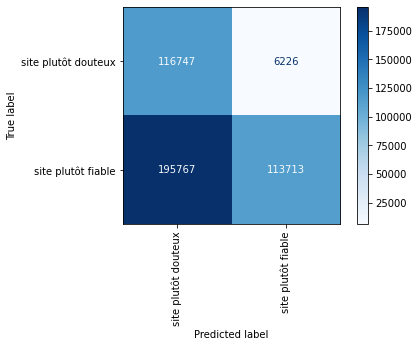

In [210]:
#matrice de confusion
#confrontation entre Y obs. sur l’éch. test et la prédiction
# predictions = best_rd_model.predict(df_test)

print("Matrices de confusion Naive pour les données d'entrainement :\n")
cm = confusion_matrix(y_train, 
                      predictions_NB_train, 
                      labels=Naive.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=Naive.classes_)
disp.plot(cmap=plt.cm.Blues,values_format='g',xticks_rotation='vertical')
plt.show()

Matrices de confusion Naive pour les données de test :



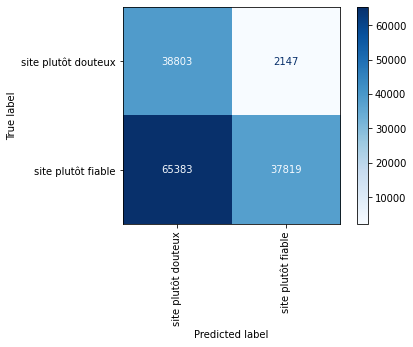

In [211]:
print("Matrices de confusion Naive pour les données de test :\n")
cm = confusion_matrix(y_test, 
                      predictions_NB_test, 
                      labels=Naive.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=Naive.classes_)
disp.plot(cmap=plt.cm.Blues,values_format='g',xticks_rotation='vertical')
plt.show()

Matrices de confusion SVM pour les données d'entrainement :



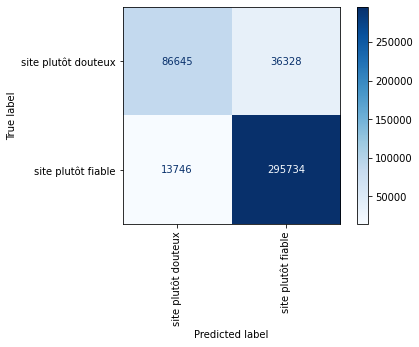

In [212]:
print("Matrices de confusion SVM pour les données d'entrainement :\n")
cm = confusion_matrix(y_train, 
                      predictions_SVM_train, 
                      labels=SVM.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=SVM.classes_)
disp.plot(cmap=plt.cm.Blues,values_format='g',xticks_rotation='vertical')
plt.show()

Matrices de confusion SVM pour les données de test :



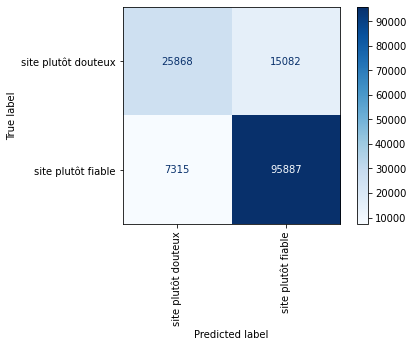

In [213]:
print("Matrices de confusion SVM pour les données de test :\n")
cm = confusion_matrix(y_test, 
                      predictions_SVM_test, 
                      labels=SVM.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=SVM.classes_)
disp.plot(cmap=plt.cm.Blues,values_format='g',xticks_rotation='vertical')
plt.show()

---

Score des matrices de confusion (compris entre -1 et 1)


*   Un résultat proche de 1 indique qu'il n'y a pratiquement que des préditions correctes (les Vrais Positifs et Vrais Négatifs).
*   Un résultat proche de -1 indique qu'il n'y a pratiquement que des préditions incorrectes (les Faux Positifs et Faux Négatifs).
*   Un résultat proche de 0 indique que les prédictions sont "aussi fiable qu'un lancé de pièce".



In [214]:
print("Prédiction Naive sur les données d'entrainement :")
matthews_corrcoef(y_train, predictions_NB_train)

Prédiction Naive sur les données d'entrainement :


0.3192244548161714

In [215]:
print("Prédiction Naive sur les données de test :")
matthews_corrcoef(y_test, predictions_NB_test)

Prédiction Naive sur les données de test :


0.3163639473426555

In [216]:
print("Prédiction SVM sur les données d'entrainement :")
matthews_corrcoef(y_train, predictions_SVM_train)

Prédiction SVM sur les données d'entrainement :


0.7053739285260281

In [217]:
print("Prédiction SVM sur les données de test :")
matthews_corrcoef(y_test, predictions_SVM_test)

Prédiction SVM sur les données de test :


0.6008047417377914



---



Résumé des différents scores des modèles :

In [218]:
print("Prédiction Naive")
print("donnée de train")
print(classification_report(y_train, predictions_NB_train))
print("donnée de test")
print(classification_report(y_test, predictions_NB_test))

Prédiction Naive
donnée de train
                     precision    recall  f1-score   support

site plutôt douteux       0.37      0.95      0.54    122973
 site plutôt fiable       0.95      0.37      0.53    309480

           accuracy                           0.53    432453
          macro avg       0.66      0.66      0.53    432453
       weighted avg       0.78      0.53      0.53    432453

donnée de test
                     precision    recall  f1-score   support

site plutôt douteux       0.37      0.95      0.53     40950
 site plutôt fiable       0.95      0.37      0.53    103202

           accuracy                           0.53    144152
          macro avg       0.66      0.66      0.53    144152
       weighted avg       0.78      0.53      0.53    144152



In [219]:
print("Prédiction SVM")
print("donnée de train")
print(classification_report(y_train, predictions_SVM_train))
print("donnée de test")
print(classification_report(y_test, predictions_SVM_test))

Prédiction SVM
donnée de train
                     precision    recall  f1-score   support

site plutôt douteux       0.86      0.70      0.78    122973
 site plutôt fiable       0.89      0.96      0.92    309480

           accuracy                           0.88    432453
          macro avg       0.88      0.83      0.85    432453
       weighted avg       0.88      0.88      0.88    432453

donnée de test
                     precision    recall  f1-score   support

site plutôt douteux       0.78      0.63      0.70     40950
 site plutôt fiable       0.86      0.93      0.90    103202

           accuracy                           0.84    144152
          macro avg       0.82      0.78      0.80    144152
       weighted avg       0.84      0.84      0.84    144152





---



In [220]:
# pd.DataFrame(predictions_SVM)
results_train = pd.DataFrame(X_train).reset_index()
results_train['predictions_train'] = predictions_SVM_train
results_train

,index,cleaned,tagged,count_followers,rt_per_followers,fav_per_followers,sentiments,predictions_train
0,359570,rt posez questions ménopause docteur geoffroy ...,RT_X @BatriceQ_PROPN :_PUNCT Posez_NOUN vos_DE...,341798.0,0.000018,0.000000,1.0,site plutôt fiable
1,81825,camille lellouche confie violences conjugales ...,Camille_PROPN Lellouche_PROPN se_PRON confie_V...,415089.0,0.000002,0.000000,1.0,site plutôt fiable
2,399755,côte divoire télécardiologie combattre hausse ...,"En_ADP Côte_PROPN d'_ADP Ivoire_PROPN ,_PUNCT ...",1416917.0,0.000002,0.000003,1.0,site plutôt douteux
3,423280,chiffres cartes comprendre rapide montée lépid...,Les_DET chiffres_NOUN et_CCONJ cartes_NOUN pou...,1177354.0,0.000004,0.000006,0.0,site plutôt fiable
4,106554,lamalgame années servi vendre larbitrage vidéo…,@Gregory_Sokol_PROPN L'_PRON amalgame_NOUN aya...,106729.0,0.000000,0.000000,1.0,site plutôt fiable
...,...,...,...,...,...,...,...,...
432448,34837,rt desident_link,RT_PROPN @Gouvci_NOUN :_PUNCT https://t.co/64Z...,923.0,0.033586,0.000000,1.0,site plutôt douteux
432449,453401,rt lhôpital retient souffle documentaire olivi...,"RT_DET @lemondeenface_NOUN :_PUNCT ""_PUNCT Qua...",640674.0,0.000020,0.000000,1.0,site plutôt fiable
432450,587462,soeur eva annoncée morte réseaux sociaux jazz ...,Alors_ADV que_SCONJ sa_DET soeur_NOUN Eva_ADJ ...,70481.0,0.000000,0.000014,1.0,site plutôt fiable
432451,674441,leurope accueilli desident_number millions dex...,l'_DET Europe_PROPN a_AUX accueilli_VERB 21_NU...,12811.0,0.000468,0.000312,1.0,site plutôt fiable


In [221]:
# pd.DataFrame(predictions_SVM)
results_test = pd.DataFrame(X_test).reset_index()
results_test['predictions_test'] = predictions_SVM_test
results_test

,index,cleaned,tagged,count_followers,rt_per_followers,fav_per_followers,sentiments,predictions_test
0,251182,rt assises ehpad charge dune loi dune réforme ...,RT_X @MartineauJ_C_PROPN :_PUNCT @BrigBourguig...,6123.0,0.001143,0.000000,1.0,site plutôt fiable
1,248736,ps desident_date desident_date jeux ps4 ps5 « ...,PS_PROPN Plus_ADV en_ADP novembre_NOUN 2021_NU...,86904.0,0.000000,0.000000,1.0,site plutôt fiable
2,527178,🔴 desident_number euros ’amende desident_link,🔴_VERB Ainsi_ADV que_SCONJ 375.000_NUM euros_N...,2475817.0,0.000005,0.000016,1.0,site plutôt fiable
3,411402,fc barcelone annoncé lorganisation dun match a...,Le_DET FC_PROPN Barcelone_PROPN a_AUX annoncé_...,5693131.0,0.000004,0.000032,1.0,site plutôt fiable
4,174052,home office bussing asylum seekers who cross c...,Home_NOUN Office_X bussing_X asylum_X seekers_...,10039038.0,0.000003,0.000003,0.0,site plutôt fiable
...,...,...,...,...,...,...,...,...
144147,56053,dirigeants parti démocrate craignent trump cau...,"""_PUNCT Les_DET dirigeants_NOUN du_DET Parti_P...",7523.0,0.000266,0.000000,1.0,site plutôt fiable
144148,16360,modèle défense européenne gagnant coups deside...,"#_NOUN MBDA_PROPN ,_PUNCT le_DET modèle_NOUN d...",50350.0,0.000020,0.000060,1.0,site plutôt fiable
144149,714415,bérénice levet «les français appris ’aimer» de...,Bérénice_PROPN Levet_PROPN :_PUNCT «_ADP Les_D...,28757.0,0.000104,0.000035,1.0,site plutôt fiable
144150,404200,assises ’aube «’attends justice vérité réparat...,Assises_NOUN de_ADP l’_DET Aube_NOUN :_PUNCT «...,12193.0,0.000000,0.000164,1.0,site plutôt fiable


Pour comparer directement avec nos données d'origine

In [222]:
data

,liability,liability_label,description,user_screen_name,retweet_count,favorite_count,count_followers,tweet,cleaned,tagged,rt_per_followers,fav_per_followers,sentiments
0,1,site plutôt douteux,France-Soir était un journal fondé par Pierre ...,france_soir,50.0,101.0,98322.0,🚨Le professeur Raoult écope d’un blâme de l’Or...,🚨le professeur raoult écope ’un blâme ’ordre m...,🚨_SCONJ Le_DET professeur_NOUN Raoult_PROPN éc...,0.000509,0.001027,1.0
1,1,site plutôt douteux,France-Soir était un journal fondé par Pierre ...,france_soir,643.0,0.0,98322.0,RT @DIVIZIO1: Recours déposé !,rt recours déposé,RT_X @DIVIZIO1_PROPN :_PUNCT Recours_NOUN dépo...,0.006540,0.000000,1.0
2,1,site plutôt douteux,France-Soir était un journal fondé par Pierre ...,france_soir,27.0,59.0,98322.0,"🎙BEST OF - Pr Michel Drancourt : IHU, épidémie...",🎙best of pr michel drancourt ihu épidémies dhi...,🎙_NOUN BEST_X OF_PROPN -_PUNCT Pr_X Michel_PRO...,0.000275,0.000600,1.0
3,1,site plutôt douteux,France-Soir était un journal fondé par Pierre ...,france_soir,14.0,37.0,98322.0,"📚 Jonathan Curiel, directeur général adjoint d...",📚 jonathan curiel directeur général adjoint pr...,"📚_PROPN Jonathan_PROPN Curiel_PROPN ,_PUNCT di...",0.000142,0.000376,1.0
4,1,site plutôt douteux,France-Soir était un journal fondé par Pierre ...,france_soir,39.0,79.0,98322.0,🖍 Le dessin du jour\n&gt; à retrouver sur http...,🖍 dessin jour retrouver desident_link desiden...,🖍_NOUN Le_DET dessin_PROPN du_DET jour_NOUN \n...,0.000397,0.000803,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
721513,0,site plutôt fiable,Un site qui donne des conseils et astuces sur ...,wikiHow,2.0,6.0,73496.0,Hi! Make space for recycling! ♻️\n\nhttps://t....,make space for recycling ♻️ desident_link,Hi_CCONJ !_PUNCT Make_X space_X for_X recyclin...,0.000027,0.000082,2.0
721514,0,site plutôt fiable,Un site qui donne des conseils et astuces sur ...,wikiHow,1.0,3.0,73496.0,Top tips for making your LinkedIn profile stan...,top tips for making your linkedin profile stan...,Top_NOUN tips_X for_X making_X your_PROPN Link...,0.000014,0.000041,1.0
721515,0,site plutôt fiable,Un site qui donne des conseils et astuces sur ...,wikiHow,0.0,1.0,73496.0,@alicjajohnson This is true 🙃,this is true 🙃,@alicjajohnson_PROPN This_X is_X true_X 🙃_PROPN,0.000000,0.000014,1.0
721516,0,site plutôt fiable,Un site qui donne des conseils et astuces sur ...,wikiHow,0.0,3.0,73496.0,15+ Ideas for a Healthy Breakfast\n\nhttps://t...,desident_number ideas for healthy breakfast de...,15_PRON +_ADP Ideas_NOUN for_X a_X Healthy_PRO...,0.000000,0.000041,1.0


# Glove (finalement pas utilisée)

Pour tester le glove on peut utiliser un t-SNE

In [223]:
"""!wget http://nlp.stanford.edu/data/glove.twitter.27B.zip"""

'!wget http://nlp.stanford.edu/data/glove.twitter.27B.zip'

In [224]:
"""!unzip glove*.zip"""

'!unzip glove*.zip'

In [225]:
"""print('Indexing word vectors.')

embeddings_index = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))"""

"print('Indexing word vectors.')\n\nembeddings_index = {}\nf = open('glove.6B.100d.txt', encoding='utf-8')\nfor line in f:\n    values = line.split()\n    word = values[0]\n    coefs = np.asarray(values[1:], dtype='float32')\n    embeddings_index[word] = coefs\nf.close()\n\nprint('Found %s word vectors.' % len(embeddings_index))"

In [226]:
"""embeddings_index = {}
with open('glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))"""

'embeddings_index = {}\nwith open(\'glove.6B.100d.txt\', encoding=\'utf-8\') as f:\n    for line in f:\n        word, coefs = line.split(maxsplit=1)\n        coefs = np.fromstring(coefs, "f", sep=" ")\n        embeddings_index[word] = coefs\n\nprint("Found %s word vectors." % len(embeddings_index))'

In [227]:
"""word_index = dict(zip(featured_names, range(len(featured_names))))"""

'word_index = dict(zip(featured_names, range(len(featured_names))))'

In [228]:
"""word_index"""

'word_index'

In [229]:
"""num_tokens = len(featured_names) + 2
embedding_dim = 100
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
        print("était "+word)
print("Converted %d words (%d misses)" % (hits, misses))
"""

'num_tokens = len(featured_names) + 2\nembedding_dim = 100\nhits = 0\nmisses = 0\n\n# Prepare embedding matrix\nembedding_matrix = np.zeros((num_tokens, embedding_dim))\nfor word, i in word_index.items():\n    embedding_vector = embeddings_index.get(word)\n    if embedding_vector is not None:\n        # Words not found in embedding index will be all-zeros.\n        # This includes the representation for "padding" and "OOV"\n        embedding_matrix[i] = embedding_vector\n        hits += 1\n    else:\n        misses += 1\n        print("était "+word)\nprint("Converted %d words (%d misses)" % (hits, misses))\n'

In [230]:
"""! pip install glove-python-binary"""

'! pip install glove-python-binary'

In [231]:
"""import glove
glove_corpus = glove.Corpus()

corpus_sentences = [ 
        [ w.lower() for w in next(corpus_sentence_tokens_gen)] # All lower-case
        for _ in range(0,100*1000) 
    ]

# Fit the co-occurrence matrix using a sliding window of 10 words.
glove_corpus.fit(corpus_sentences, window=10)

print("Dictionary length=%d" % (len(glove_corpus.dictionary),))"""

'import glove\nglove_corpus = glove.Corpus()\n\ncorpus_sentences = [ \n        [ w.lower() for w in next(corpus_sentence_tokens_gen)] # All lower-case\n        for _ in range(0,100*1000) \n    ]\n\n# Fit the co-occurrence matrix using a sliding window of 10 words.\nglove_corpus.fit(corpus_sentences, window=10)\n\nprint("Dictionary length=%d" % (len(glove_corpus.dictionary),))'